In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from joblib import dump

In [2]:
x_train = np.load('./kaggle_assignment/data/processed/X_train.npy')
y_train  = np.load('./kaggle_assignment/data/processed/y_train.npy' )

x_test = np.load('./kaggle_assignment/data/processed/x_test.npy')
y_test = np.load('./kaggle_assignment/data/processed/y_test.npy' )

x_val = np.load('./kaggle_assignment/data/processed/x_val.npy')
y_val  = np.load('./kaggle_assignment/data/processed/y_val.npy' )

In [3]:
def eval_model(mod, xvar, yvar,runtype):
  mod.fit(xvar,yvar)
  mod_pred=mod.predict(xvar)
  mod_pred_proba=mod.predict_proba(xvar)
  print('Accuracy Score',accuracy_score(yvar,mod_pred),'F1 Score',f1_score(yvar,mod_pred), 'R2 Score',mod.score(xvar, yvar),'(',runtype,')','roc_auc_score ',roc_auc_score(yvar, mod_pred_proba[:, 1]))
  disp = plot_confusion_matrix(mod, xvar, yvar, cmap=plt.cm.Blues, normalize='true')
  disp.ax_.set_title('Confusion matrix '+runtype)
  return

Accuracy Score 0.853515625 F1 Score 0.9174917491749176 R2 Score 0.853515625 ( Train ) roc_auc_score  0.8569608149224903
Accuracy Score 0.8575 F1 Score 0.9200000000000002 R2 Score 0.8575 ( Val ) roc_auc_score  0.8479375693537031


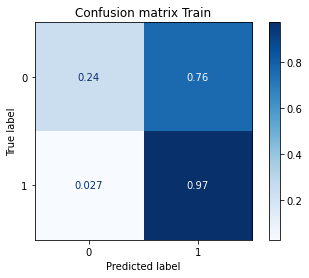

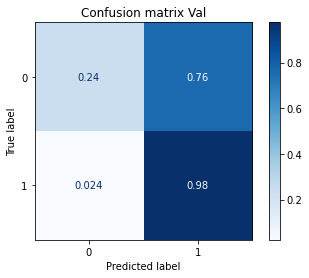

In [5]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
eval_model(neigh,x_train,y_train,"Train")
eval_model(neigh,x_val,y_val,"Val")

Accuracy Score 0.8490234375 F1 Score 0.915822715888054 R2 Score 0.8490234375 ( Train ) roc_auc_score  0.8251743448917954
Accuracy Score 0.850625 F1 Score 0.9169273548835593 R2 Score 0.850625 ( Val ) roc_auc_score  0.8173132918635613


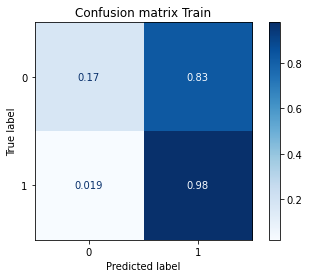

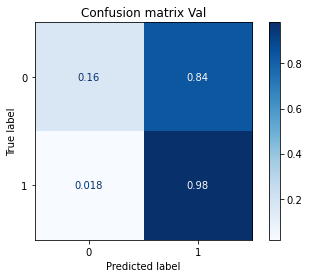

In [6]:
neigh1 = KNeighborsClassifier(n_neighbors=7)
eval_model(neigh1,x_train,y_train,"Train")
eval_model(neigh1,x_val,y_val,"Val")

Accuracy Score 0.8740234375 F1 Score 0.9279249078109286 R2 Score 0.8740234375 ( Train ) roc_auc_score  0.9059337690836597
Accuracy Score 0.875625 F1 Score 0.9288014311270125 R2 Score 0.875625 ( Val ) roc_auc_score  0.9000640299463133


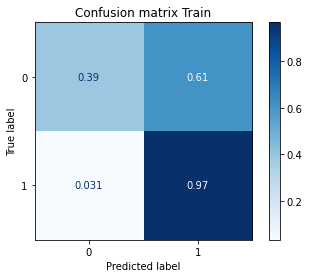

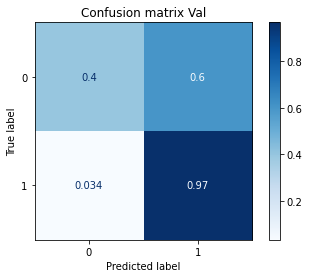

In [7]:
neigh2 = KNeighborsClassifier(n_neighbors=3)
eval_model(neigh2,x_train,y_train,"Train")
eval_model(neigh2,x_val,y_val,"Val")

Accuracy Score 0.88125 F1 Score 0.9236564540431943 R2 Score 0.88125 ( Train ) roc_auc_score  0.9456554215330489
Accuracy Score 0.8675 F1 Score 0.9143088116410671 R2 Score 0.8675 ( Val ) roc_auc_score  0.9401131678598642


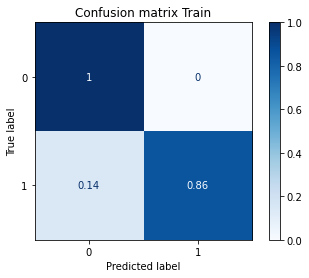

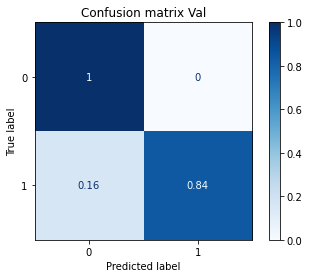

In [8]:
neigh3 = KNeighborsClassifier(n_neighbors=2)
eval_model(neigh3,x_train,y_train,"Train")
eval_model(neigh3,x_val,y_val,"Val")

Accuracy Score 1.0 F1 Score 1.0 R2 Score 1.0 ( Train ) roc_auc_score  1.0
Accuracy Score 1.0 F1 Score 1.0 R2 Score 1.0 ( Val ) roc_auc_score  1.0


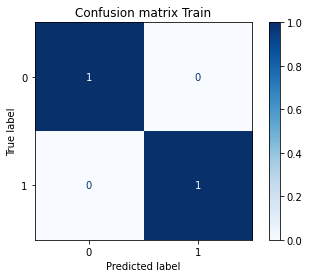

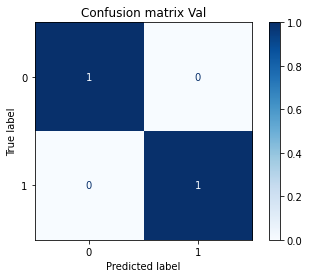

In [9]:
neigh4 = KNeighborsClassifier(weights='distance')
eval_model(neigh4,x_train,y_train,"Train")
eval_model(neigh4,x_val,y_val,"Val")

Accuracy Score 1.0 F1 Score 1.0 R2 Score 1.0 ( Train ) roc_auc_score  1.0
Accuracy Score 1.0 F1 Score 1.0 R2 Score 1.0 ( Val ) roc_auc_score  1.0


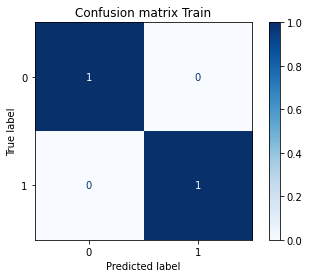

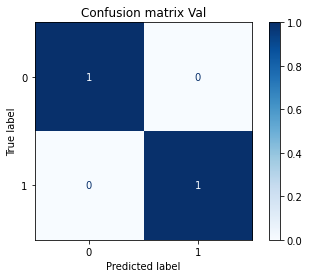

In [10]:
neigh5 = KNeighborsClassifier(n_neighbors=7,weights='distance')
eval_model(neigh5,x_train,y_train,"Train")
eval_model(neigh5,x_val,y_val,"Val")

Accuracy Score 1.0 F1 Score 1.0 R2 Score 1.0 ( Test ) roc_auc_score  1.0


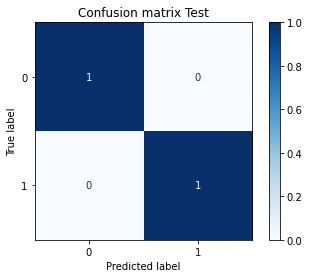

In [11]:
eval_model(neigh5,x_test,y_test,"Test")

Accuracy Score 0.85 F1 Score 0.8983050847457628 R2 Score 0.85 ( train ) roc_auc_score  0.9307692307692308


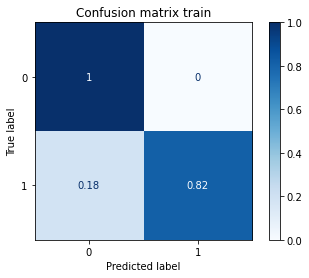

In [10]:
eval_model(neigh3,x_test,y_test,"train")

Accuracy Score 0.8675 F1 Score 0.9143088116410671 R2 Score 0.8675 ( train ) roc_auc_score  0.9401131678598642


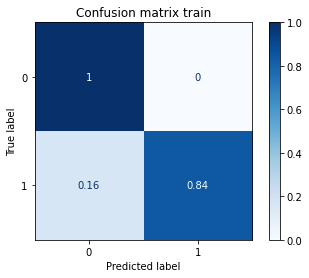

In [11]:
eval_model(neigh3,x_test,y_test,"train")

In [14]:
df_test=pd.read_csv('./kaggle_assignment/data/raw/test.csv')
df_actual_test_cleaned = df_test.drop(['Id_old', 'Id'], axis=1)

In [15]:
y_actual_test_pred=neigh3.predict(df_actual_test_cleaned)
y_actual_test_pred_prob=neigh3.predict_proba(df_actual_test_cleaned)

In [20]:
neigh3.classes_

array([0, 1], dtype=int64)

In [23]:
np.unique(y_actual_test_pred_prob[:,1],return_counts=True)

(array([0. , 0.5, 1. ]), array([ 130,  910, 2759], dtype=int64))

In [24]:
df_test['TARGET_5Yrs'] = y_actual_test_pred_prob[:,1]

In [27]:
df_test.to_csv('./kaggle_assignment/data/processed/TestResult_KNN.csv',index=False,columns=['Id', 'TARGET_5Yrs'])

In [15]:
y_actual_test_pred_prob1=neigh5.predict_proba(df_actual_test_cleaned)
np.unique(y_actual_test_pred_prob1[:,1],return_counts=True)

(array([0.1274543 , 0.13506986, 0.13571583, ..., 0.91324671, 0.91403674,
        1.        ]),
 array([   1,    1,    1, ...,    1,    1, 1187], dtype=int64))

In [18]:
df_test['TARGET_5Yrs'] = y_actual_test_pred_prob1[:,1]

In [19]:
df_test.to_csv('./kaggle_assignment/data/processed/TestResult_KNN_1.csv',index=False,columns=['Id', 'TARGET_5Yrs'])